#FUNÇÃO CONTAGIO

In [4]:
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt
from community import community_louvain

In [20]:
def PT(n):
    PT = []  # Lista para armazenar os valores de P_FINAL
    LL=[] # Lista para armazenar os valores das variaçoes do contagio
    GG=[] #Lista com as redes
    GI=[]
    G1G1=[]
    for _ in range(6):
        # Criando um grafo completo
        G=np.array([[0,1,1,0,0,0,0,0,0,0],[ 1,0,1,0,0,0,0,0,0,0],[1,1,0,1,0,0,1,0,0,0],[ 0,0,1,0,1,1,0,0,0,0],[0,0,0,1,0,1,0,0,0,0],[0,0,0,1,1,0,0,0,0,0],[0,0,1,0,0,0,0,1,1,0],[0,0,0,0,0,0,1,0,1,0],[0,0,0,0,0,0,1,1,0,1],[0,0,0,0,0,0,0,0,1,0]])
        # Criando o vetor P_uniforme
        P=np.array([10.0,9.0,7,6,5,7,5,1,6,5])
        # d1 e d2
        d1=np.ones(10)
        d2 = np.full(10, 2)
        #numero de infetados
        n_infectados = 10
        I = [0,9]
        T = 5
        mi1 = 0.9
        # CONTAGIO
        # colocando o I em um vetor z
        z = np.zeros(n)
        for i in I:
            z[i] = 1
        #M = np.zeros((T, n))  # matriz na qual guardarei o P em cada etapa T
        GI.append(G)
        M=[]
        #N onde guardarei as variacoes de P da etapa (t+1 ) e t
        #K=[]
        for t in range(T):  # tempo do contagio
            # SI
            C = np.dot(G, z)
            for j in range(n):  # colocando as probabilidades
                #a = random.random()
                #if mi1 > a:
                if C[j] >0:
                    for i in range(len(z)):
                        # código para aproximar, afastar ou não acontecer nada
                        if z[i] == 1 and G[i][j] == 1:
                            # se aproxima
                            if abs(P[j] - P[i]) < d1[j]:
                                P[j] = (P[j] + P[i]) / 2
                                if P[j] < -10:
                                    P[j] = -10
                                elif P[j] > 10:
                                    P[j] = 10
                            # se afasta
                            elif abs(P[j] - P[i]) > d2[j]:
                                G[i][j]=0
                                G[j][i]=0
            z=C+z
            h=np.sum(C==1)
            #M.append(h)
            M.append(P)
        G1=G
        #return(M)
        N = np.zeros((T-1,n))
        for k in range(T-1):
          N[k]=abs(M[k+1]-M[k])
        L= np.sum(N, axis=1)
        LL.append(L)
        #return(M)
        PT.append(P)
        GG.append(G) # Adiciona o P atual à lista PT
        G1G1.append(G1)
    return PT, GI , M ,N ,LL ,L, GG,G1G1

Aplicando a Função Ccontagio

In [21]:
PT,GI,M,N,LL,L,GG,G1G1=PT(10)

Obtendo a matriz nas varias redes(6)

In [22]:
GI

[array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]),
 array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]),
 array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 

#FUNÇÃO GRAFICO DAS MATRIZES ADJACENCIAS INICIAIS

In [24]:
def GRAFICO_matriz_GG(GI):   # Configurar o layout dos subplots para 2 linhas e 3 colunas
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    # Iterar pelas matrizes e criar os gráficos de rede
    for i, matrix in enumerate(GI):
        # Criar o grafo a partir da matriz de adjacência
        G = nx.from_numpy_array(matrix)

            # Aplica o algoritmo de Louvain
        partition = community_louvain.best_partition(G)

        # Organiza os nós em listas de comunidades
        communities = {}
        for node, community in partition.items():
            if community not in communities:
                communities[community] = []
            communities[community].append(node)

        # Imprime as comunidades
        for community, nodes in communities.items():
            print(f"Comunidade {community}: {nodes}")


        # Determinar a posição no layout 2x3
        row, col = divmod(i, 3)

        # Desenhar o grafo
        pos = nx.spring_layout(G)
        nx.draw(G, pos, ax=axes[row, col], with_labels=True, node_color='lightblue', edge_color='gray')
        axes[row, col].set_title(f'Grafo {i+1}')


APLICANDO FUNÇAO GRAFICO DAS MATRIZES ADJACENCIAS INICIAIS

Comunidade 1: [0, 1, 2, 6]
Comunidade 2: [3, 4, 5]
Comunidade 3: [7]
Comunidade 0: [8, 9]
Comunidade 0: [0, 1]
Comunidade 1: [2, 6, 8, 9]
Comunidade 2: [3, 4, 5]
Comunidade 3: [7]
Comunidade 0: [0, 1, 2]
Comunidade 2: [3, 4, 5]
Comunidade 1: [6, 8, 9]
Comunidade 3: [7]
Comunidade 1: [0, 1, 2, 6]
Comunidade 2: [3, 4, 5]
Comunidade 3: [7]
Comunidade 0: [8, 9]
Comunidade 0: [0, 1]
Comunidade 1: [2, 6, 8, 9]
Comunidade 2: [3, 4, 5]
Comunidade 3: [7]
Comunidade 0: [0, 1]
Comunidade 1: [2, 6, 8, 9]
Comunidade 2: [3, 4, 5]
Comunidade 3: [7]


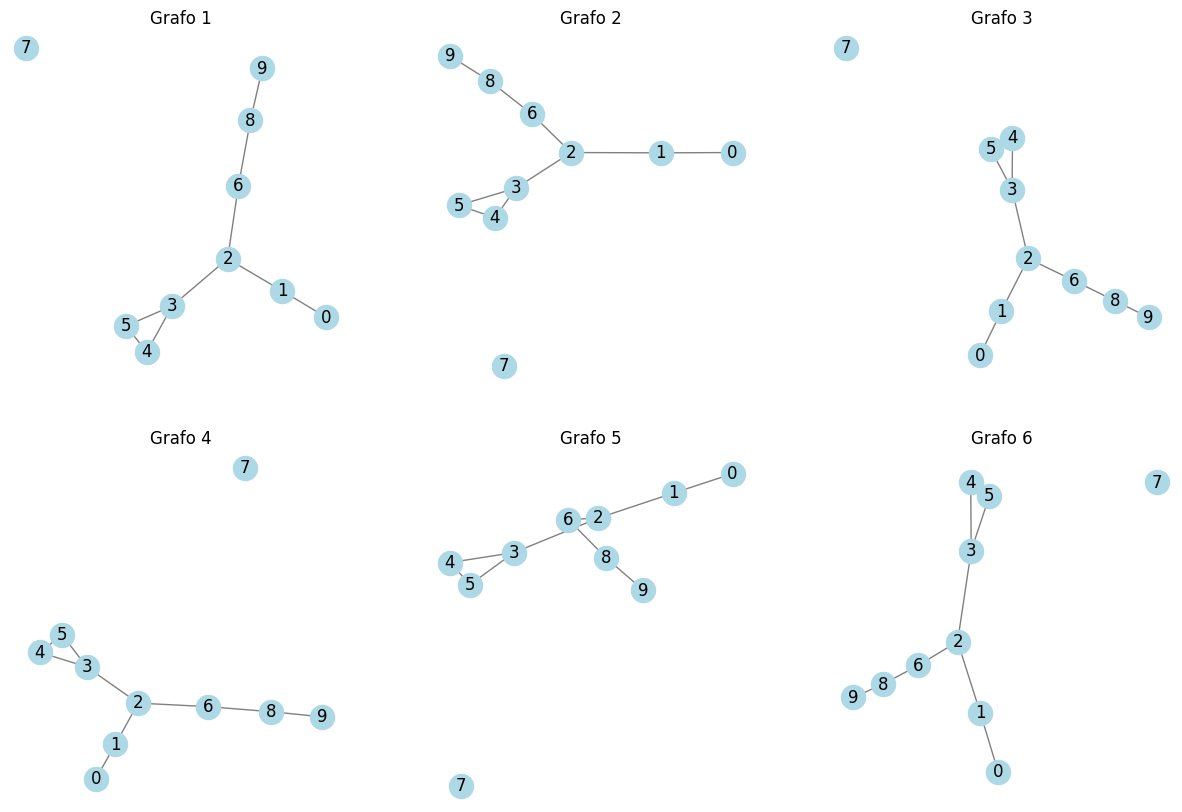

In [27]:
GRAFICO_matriz_GG(GI)

FUNÇÃO P FINAL MAS NA VERDADE QUERO COLOCAR P INICIAL  

In [29]:
def grafico_P_final(PT):
# Exemplo de uso
  P_FINAL = PT

  # Criar a figura com 10 linhas e 10 colunas de subplots
  fig, axs = plt.subplots(2, 3, figsize=(15, 10))
  plt.title('P')
  # Plotar cada array de P_FINAL em um subplot individual como histograma
  for i, ax in enumerate(axs.flatten()):
      ax.hist(P_FINAL[i], bins=10, range=(-10, 10))
      ax.set_title(f"P FINAL {i+1}")

  # Ajustar o layout para evitar sobreposição

  plt.tight_layout()

  plt.show()

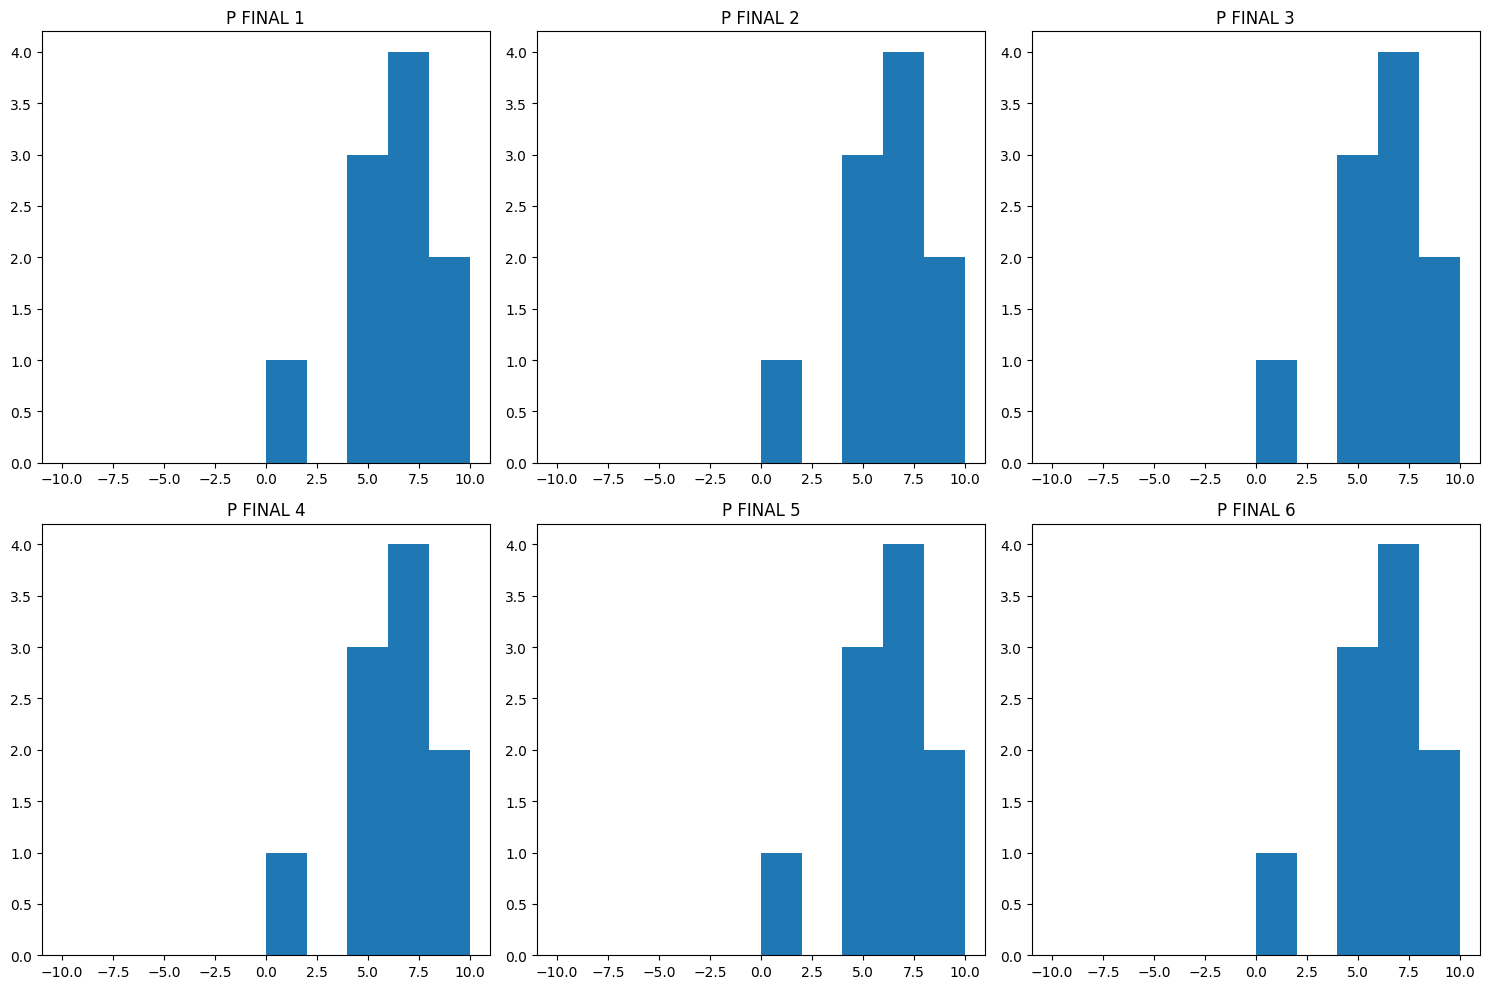

In [30]:
grafico_P_final(PT)

# FUNÇAO COMUNIDADE_NÓS  
 para ver a comunidade em varias etapas :comunidade :elementos

In [6]:
def matriz_GG(GG):
    # Lista para armazenar as comunidades de cada matriz
    comunidades_por_matriz = []

    # Iterar pelas matrizes e criar os gráficos de rede
    for i, matrix in enumerate(GG):
        # Criar o grafo a partir da matriz de adjacência
        G = nx.from_numpy_array(matrix)

        # Aplica o algoritmo de Louvain
        partition = community_louvain.best_partition(G)

        # Organiza os nós em listas de comunidades
        communities = {}
        for node, community in partition.items():
            if community not in communities:
                communities[community] = []
            communities[community].append(node)

        # Armazena as comunidades para a matriz atual
        comunidades_por_matriz.append(communities)

    # Retorna a lista de comunidades por matriz
    return comunidades_por_matriz

Aplicando a matriz a função comunidade

In [7]:
matriz_GG(GG)

[{0: [0, 1], 1: [2, 6, 8, 9], 2: [3, 4, 5], 3: [7]},
 {0: [0, 1], 1: [2, 6, 8, 9], 2: [3, 4, 5], 3: [7]},
 {1: [0, 1, 2, 6], 2: [3, 4, 5], 3: [7], 0: [8, 9]},
 {0: [0, 1, 2, 6], 2: [3, 4, 5], 3: [7], 1: [8, 9]},
 {0: [0, 1], 1: [2, 6, 8, 9], 2: [3, 4, 5], 3: [7]},
 {1: [0, 1, 2], 2: [3, 4, 5], 0: [6, 8, 9], 3: [7]}]

#FUNÇÃO COMUNIDADE_P
Associando comunidade a seu valor de P   

In [11]:
def matriz_GG_P(GG, P):
    # Lista para armazenar as comunidades de cada matriz
    comunidades_por_matriz = []

    # Iterar pelas matrizes e criar os gráficos de rede
    for i, matrix in enumerate(GG):
        # Criar o grafo a partir da matriz de adjacência
        G = nx.from_numpy_array(matrix)

        # Aplica o algoritmo de Louvain
        partition = community_louvain.best_partition(G)

        # Organiza os nós em listas de comunidades
        communities = {}
        for node, community in partition.items():
            if community not in communities:
                communities[community] = []
            communities[community].append(node)

        # Armazena as comunidades para a matriz atual
        comunidades_por_matriz.append(communities)

    # Converte os nós para os valores de P nas comunidades
    comunidades_com_valores = []
    for communities in comunidades_por_matriz:
        comunidades_com_valores.append({community: [P[node] for node in nodes] for community, nodes in communities.items()})

    # Retorna a lista de comunidades com os valores de P por matriz
    return comunidades_com_valores

# Exemplo de uso
GG = [np.array([
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
    ]) for _ in range(6)]

P = [10, 9, 7, 6, 5, 7, 5, 1, 6, 5]

comunidades_com_valores = matriz_GG_P(GG, P)

# Imprime as comunidades com os valores de P de cada matriz
for i, communities in enumerate(comunidades_com_valores):
    print(f"Matriz {i+1}:")
    for community, values in communities.items():
        print(f"  Comunidade {community}: {values}")

Matriz 1:
  Comunidade 0: [10, 9]
  Comunidade 1: [7, 5, 6, 5]
  Comunidade 2: [6, 5, 7]
  Comunidade 3: [1]
Matriz 2:
  Comunidade 0: [10, 9]
  Comunidade 1: [7, 5, 6, 5]
  Comunidade 2: [6, 5, 7]
  Comunidade 3: [1]
Matriz 3:
  Comunidade 1: [10, 9, 7, 5]
  Comunidade 2: [6, 5, 7]
  Comunidade 3: [1]
  Comunidade 0: [6, 5]
Matriz 4:
  Comunidade 1: [10, 9, 7, 5]
  Comunidade 2: [6, 5, 7]
  Comunidade 3: [1]
  Comunidade 0: [6, 5]
Matriz 5:
  Comunidade 0: [10, 9]
  Comunidade 1: [7, 5, 6, 5]
  Comunidade 2: [6, 5, 7]
  Comunidade 3: [1]
Matriz 6:
  Comunidade 0: [10, 9]
  Comunidade 1: [7, 5, 6, 5]
  Comunidade 2: [6, 5, 7]
  Comunidade 3: [1]


#FUNÇÃO MEDIA DE P DE CADA CAMARA DE ECO

In [13]:
def matriz_GG_COMUNIDADE_MEDIA_P(GG, P):
    # Lista para armazenar as comunidades de cada matriz
    comunidades_por_matriz = []

    # Iterar pelas matrizes e criar os gráficos de rede
    for i, matrix in enumerate(GG):
        # Criar o grafo a partir da matriz de adjacência
        G = nx.from_numpy_array(matrix)

        # Aplica o algoritmo de Louvain
        partition = community_louvain.best_partition(G)

        # Organiza os nós em listas de comunidades
        communities = {}
        for node, community in partition.items():
            if community not in communities:
                communities[community] = []
            communities[community].append(node)

        # Armazena as comunidades para a matriz atual
        comunidades_por_matriz.append(communities)

    # Converte os nós para as médias dos valores de P nas comunidades
    medias_comunidades = []
    for communities in comunidades_por_matriz:
        medias_comunidades.append({community: np.mean([P[node] for node in nodes]) for community, nodes in communities.items()})

    # Retorna a lista de médias por comunidade por matriz
    return medias_comunidades

# Exemplo de uso
GG = [np.array([
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
    ]) for _ in range(6)]

P = [10, 9, 7, 6, 5, 7, 5, 1, 6, 5]

medias_comunidades =  matriz_GG_COMUNIDADE_MEDIA_P(GG, P)

# Imprime as médias das comunidades de cada matriz
for i, communities in enumerate(medias_comunidades):
    print(f"Matriz {i+1}:")
    for community, mean_value in communities.items():
        print(f"  Comunidade {community}: {mean_value:.2f}")

Matriz 1:
  Comunidade 1: 8.67
  Comunidade 2: 6.00
  Comunidade 0: 5.33
  Comunidade 3: 1.00
Matriz 2:
  Comunidade 1: 8.67
  Comunidade 2: 6.00
  Comunidade 0: 5.33
  Comunidade 3: 1.00
Matriz 3:
  Comunidade 0: 7.75
  Comunidade 2: 6.00
  Comunidade 3: 1.00
  Comunidade 1: 5.50
Matriz 4:
  Comunidade 0: 8.67
  Comunidade 2: 6.00
  Comunidade 1: 5.33
  Comunidade 3: 1.00
Matriz 5:
  Comunidade 0: 8.67
  Comunidade 2: 6.00
  Comunidade 1: 5.33
  Comunidade 3: 1.00
Matriz 6:
  Comunidade 0: 9.50
  Comunidade 1: 5.75
  Comunidade 2: 6.00
  Comunidade 3: 1.00


#FUNÇÃO COMUNIDADE MEDIA P E TAMANHO DE CADA COMUNIDADE

In [15]:
def matriz_GG_COMUNIDADE_MEDIA_P_TAMANHO_COMUNIDADE(GG, P):
    # Lista para armazenar as comunidades de cada matriz
    comunidades_por_matriz = []

    # Iterar pelas matrizes e criar os gráficos de rede
    for i, matrix in enumerate(GG):
        # Criar o grafo a partir da matriz de adjacência
        G = nx.from_numpy_array(matrix)

        # Aplica o algoritmo de Louvain
        partition = community_louvain.best_partition(G)

        # Organiza os nós em listas de comunidades
        communities = {}
        for node, community in partition.items():
            if community not in communities:
                communities[community] = []
            communities[community].append(node)

        # Armazena as comunidades para a matriz atual
        comunidades_por_matriz.append(communities)

    # Converte os nós para as médias dos valores de P e conta os elementos nas comunidades
    info_comunidades = []
    for communities in comunidades_por_matriz:
        comunidade_info = {}
        for community, nodes in communities.items():
            valores_p = [P[node] for node in nodes]
            media_p = np.mean(valores_p)
            tamanho = len(nodes)
            comunidade_info[community] = (media_p, tamanho)
        info_comunidades.append(comunidade_info)

    # Retorna a lista de médias e tamanhos por comunidade por matriz
    return info_comunidades

# Exemplo de uso
GG = [np.array([
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
    ]) for _ in range(6)]

P = [10, 9, 7, 6, 5, 7, 5, 1, 6, 5]

info_comunidades = matriz_GG_COMUNIDADE_MEDIA_P_TAMANHO_COMUNIDADE(GG, P)
# Imprime as médias e tamanhos das comunidades de cada matriz
for i, communities in enumerate(info_comunidades):
    print(f"Matriz {i+1}:")
    for community, (mean_value, size) in communities.items():
        print(f"  Comunidade {community}: Média = {mean_value:.2f}, Tamanho = {size}")

Matriz 1:
  Comunidade 0: Média = 8.67, Tamanho = 3
  Comunidade 2: Média = 6.00, Tamanho = 3
  Comunidade 1: Média = 5.33, Tamanho = 3
  Comunidade 3: Média = 1.00, Tamanho = 1
Matriz 2:
  Comunidade 1: Média = 8.67, Tamanho = 3
  Comunidade 2: Média = 6.00, Tamanho = 3
  Comunidade 0: Média = 5.33, Tamanho = 3
  Comunidade 3: Média = 1.00, Tamanho = 1
Matriz 3:
  Comunidade 1: Média = 8.67, Tamanho = 3
  Comunidade 2: Média = 6.00, Tamanho = 3
  Comunidade 0: Média = 5.33, Tamanho = 3
  Comunidade 3: Média = 1.00, Tamanho = 1
Matriz 4:
  Comunidade 1: Média = 8.67, Tamanho = 3
  Comunidade 2: Média = 6.00, Tamanho = 3
  Comunidade 0: Média = 5.33, Tamanho = 3
  Comunidade 3: Média = 1.00, Tamanho = 1
Matriz 5:
  Comunidade 0: Média = 9.50, Tamanho = 2
  Comunidade 1: Média = 5.75, Tamanho = 4
  Comunidade 2: Média = 6.00, Tamanho = 3
  Comunidade 3: Média = 1.00, Tamanho = 1
Matriz 6:
  Comunidade 0: Média = 9.50, Tamanho = 2
  Comunidade 1: Média = 5.75, Tamanho = 4
  Comunidade 2: 

#FUNÇÃO COMUNIDADE MEDIA P E TAMANHO DE CADA COMUNIDADE E GRAFICO DE PONTOS

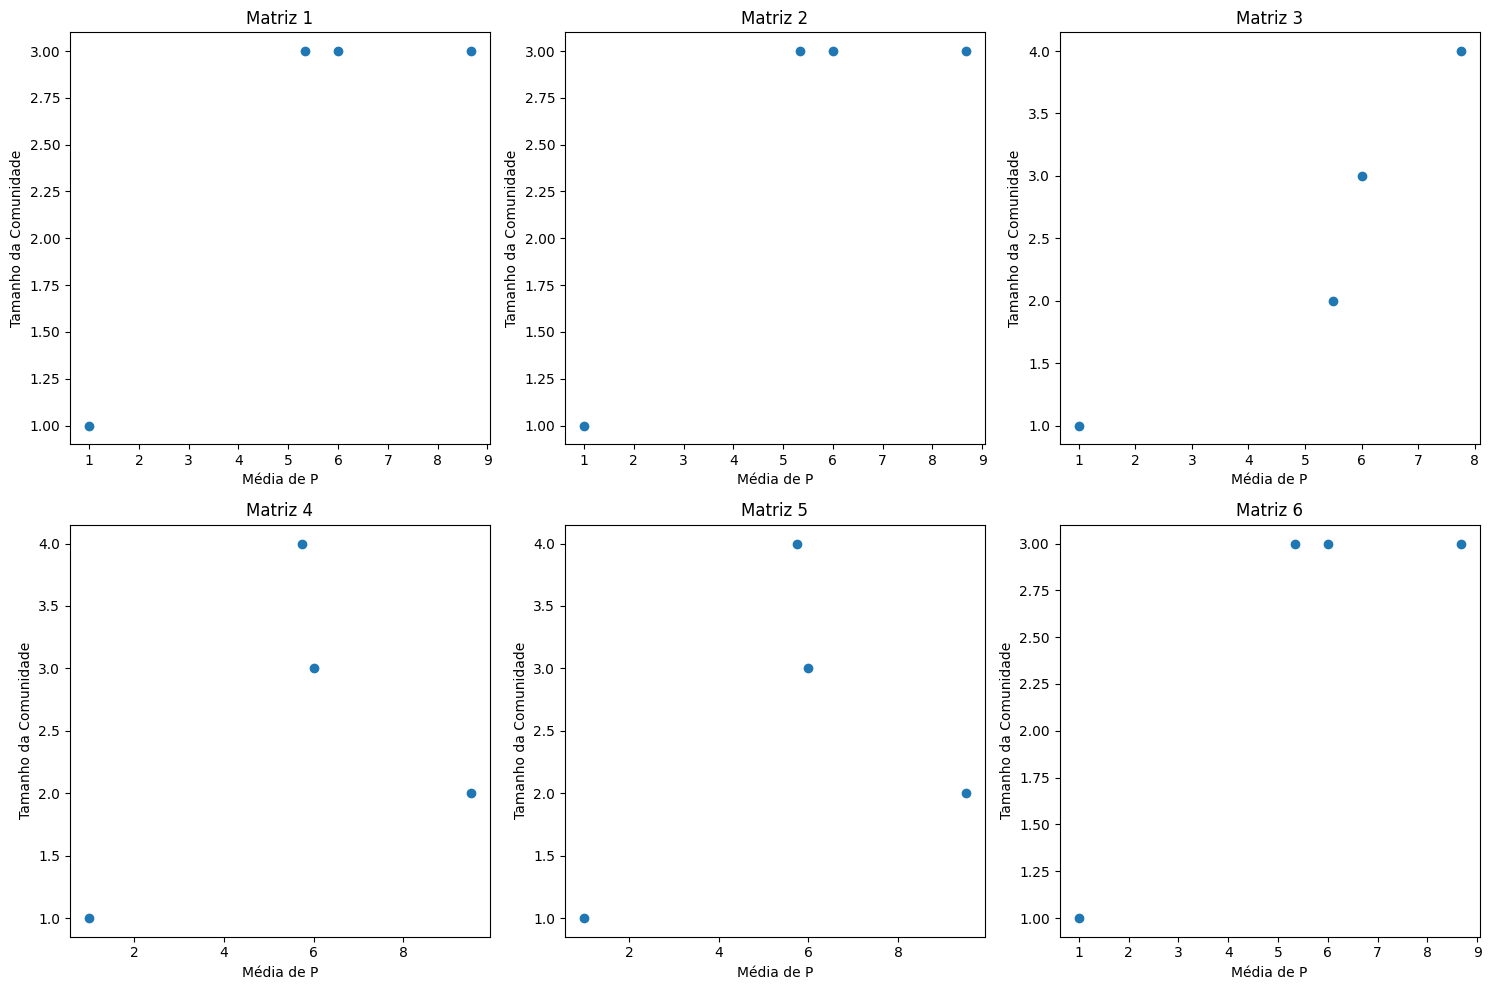

In [16]:
import numpy as np
import networkx as nx
from community import community_louvain
import matplotlib.pyplot as plt

def matriz_GG_COMUNIDADE_MEDIA_P_TAMANHO_COMUNIDADE_GRAFICO_PONTOS(GG, P):
    # Lista para armazenar as comunidades de cada matriz
    comunidades_por_matriz = []

    # Iterar pelas matrizes e criar os gráficos de rede
    for i, matrix in enumerate(GG):
        # Criar o grafo a partir da matriz de adjacência
        G = nx.from_numpy_array(matrix)

        # Aplica o algoritmo de Louvain
        partition = community_louvain.best_partition(G)

        # Organiza os nós em listas de comunidades
        communities = {}
        for node, community in partition.items():
            if community not in communities:
                communities[community] = []
            communities[community].append(node)

        # Armazena as comunidades para a matriz atual
        comunidades_por_matriz.append(communities)

    # Converte os nós para as médias dos valores de P e conta os elementos nas comunidades
    info_comunidades = []
    for communities in comunidades_por_matriz:
        comunidade_info = {}
        for community, nodes in communities.items():
            valores_p = [P[node] for node in nodes]
            media_p = np.mean(valores_p)
            tamanho = len(nodes)
            comunidade_info[community] = (media_p, tamanho)
        info_comunidades.append(comunidade_info)

    # Retorna a lista de médias e tamanhos por comunidade por matriz
    return info_comunidades

# Exemplo de uso
GG = [np.array([
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
    ]) for _ in range(6)]

P = [10, 9, 7, 6, 5, 7, 5, 1, 6, 5]

info_comunidades = matriz_GG_COMUNIDADE_MEDIA_P_TAMANHO_COMUNIDADE_GRAFICO_PONTOS(GG, P)

# Plotar os gráficos
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, communities in enumerate(info_comunidades):
    medias = [mean_value for mean_value, size in communities.values()]
    tamanhos = [size for mean_value, size in communities.values()]

    axes[i].scatter(medias, tamanhos)
    axes[i].set_title(f'Matriz {i+1}')
    axes[i].set_xlabel('Média de P')
    axes[i].set_ylabel('Tamanho da Comunidade')

plt.tight_layout()
plt.show()

#FUNÇÃO COMUNIDADE MEDIA P E TAMANHO DE CADA COMUNIDADE E GRAFICO DE BARRAS 1

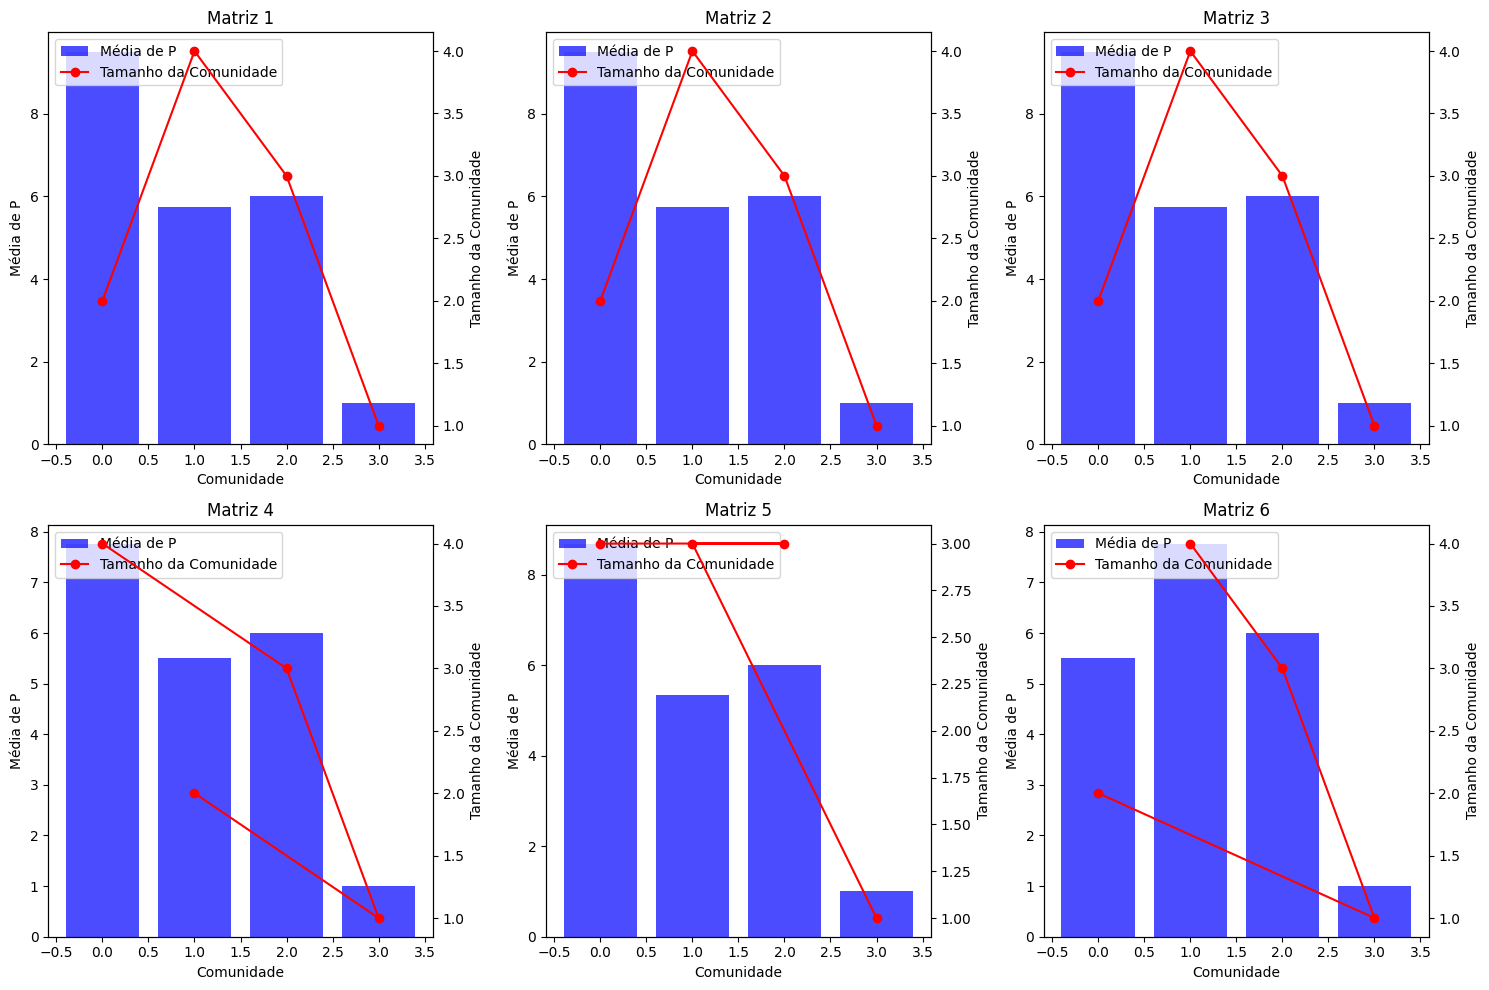

In [18]:
import numpy as np
import networkx as nx
from community import community_louvain
import matplotlib.pyplot as plt

def matriz_GG_COMUNIDADE_MEDIA_P_TAMANHO_COMUNIDADE_GRAFICO_BARRAS1(GG, P):
    # Lista para armazenar as comunidades de cada matriz
    comunidades_por_matriz = []

    # Iterar pelas matrizes e criar os gráficos de rede
    for i, matrix in enumerate(GG):
        # Criar o grafo a partir da matriz de adjacência
        G = nx.from_numpy_array(matrix)

        # Aplica o algoritmo de Louvain
        partition = community_louvain.best_partition(G)

        # Organiza os nós em listas de comunidades
        communities = {}
        for node, community in partition.items():
            if community not in communities:
                communities[community] = []
            communities[community].append(node)

        # Armazena as comunidades para a matriz atual
        comunidades_por_matriz.append(communities)

    # Converte os nós para as médias dos valores de P e conta os elementos nas comunidades
    info_comunidades = []
    for communities in comunidades_por_matriz:
        comunidade_info = {}
        for community, nodes in communities.items():
            valores_p = [P[node] for node in nodes]
            media_p = np.mean(valores_p)
            tamanho = len(nodes)
            comunidade_info[community] = (media_p, tamanho)
        info_comunidades.append(comunidade_info)

    # Retorna a lista de médias e tamanhos por comunidade por matriz
    return info_comunidades

# Exemplo de uso
GG = [np.array([
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
    ]) for _ in range(6)]

P = [10, 9, 7, 6, 5, 7, 5, 1, 6, 5]

info_comunidades = matriz_GG_COMUNIDADE_MEDIA_P_TAMANHO_COMUNIDADE_GRAFICO_BARRAS1(GG, P)

# Plotar os gráficos
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, communities in enumerate(info_comunidades):
    medias = [mean_value for mean_value, size in communities.values()]
    tamanhos = [size for mean_value, size in communities.values()]
    comunidades = list(communities.keys())

    axes[i].bar(comunidades, medias, color='blue', alpha=0.7, label='Média de P')
    axes[i].set_title(f'Matriz {i+1}')
    axes[i].set_xlabel('Comunidade')
    axes[i].set_ylabel('Média de P')

    # Cria um segundo eixo y para mostrar o tamanho das comunidades
    ax2 = axes[i].twinx()
    ax2.plot(comunidades, tamanhos, color='red', marker='o', label='Tamanho da Comunidade')
    ax2.set_ylabel('Tamanho da Comunidade')

    # Adiciona uma legenda combinada
    h1, l1 = axes[i].get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    axes[i].legend(h1+h2, l1+l2, loc='upper left')

plt.tight_layout()
plt.show()

#FUNÇÃO COMUNIDADE MEDIA P E TAMANHO DE CADA COMUNIDADE E GRAFICO DE BARRAS 2

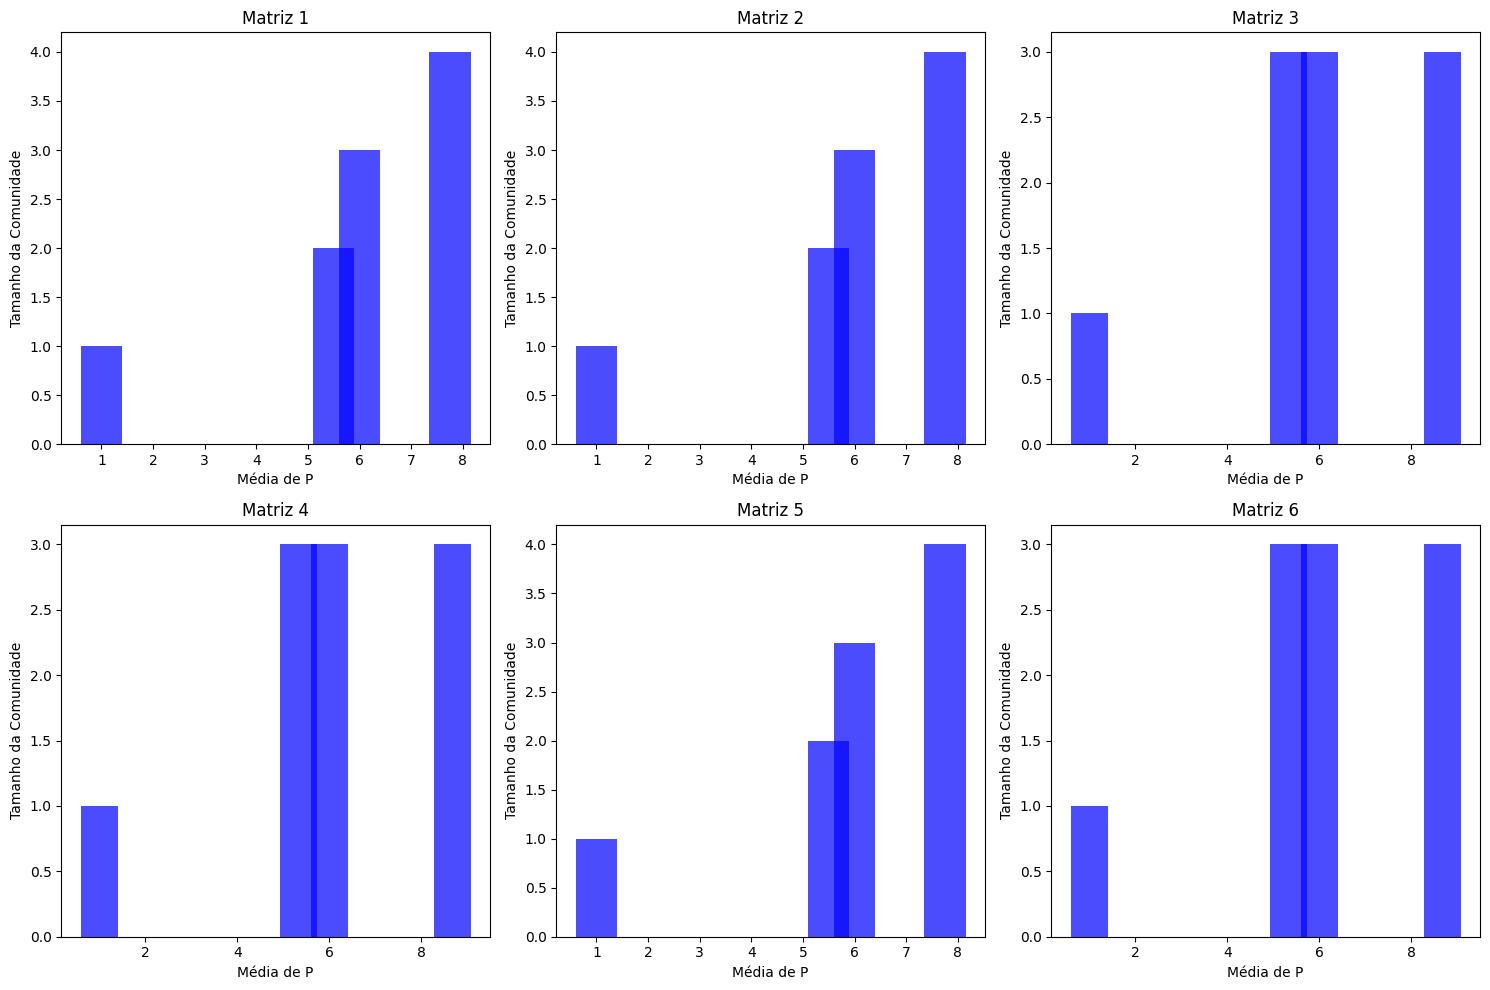

In [20]:
import numpy as np
import networkx as nx
from community import community_louvain
import matplotlib.pyplot as plt

def matriz_GG_COMUNIDADE_MEDIA_P_TAMANHO_COMUNIDADE_GRAFICO_BARRAS2(GG, P):
    # Lista para armazenar as comunidades de cada matriz
    comunidades_por_matriz = []

    # Iterar pelas matrizes e criar os gráficos de rede
    for i, matrix in enumerate(GG):
        # Criar o grafo a partir da matriz de adjacência
        G = nx.from_numpy_array(matrix)

        # Aplica o algoritmo de Louvain
        partition = community_louvain.best_partition(G)

        # Organiza os nós em listas de comunidades
        communities = {}
        for node, community in partition.items():
            if community not in communities:
                communities[community] = []
            communities[community].append(node)

        # Armazena as comunidades para a matriz atual
        comunidades_por_matriz.append(communities)

    # Converte os nós para as médias dos valores de P e conta os elementos nas comunidades
    info_comunidades = []
    for communities in comunidades_por_matriz:
        comunidade_info = {}
        for community, nodes in communities.items():
            valores_p = [P[node] for node in nodes]
            media_p = np.mean(valores_p)
            tamanho = len(nodes)
            comunidade_info[community] = (media_p, tamanho)
        info_comunidades.append(comunidade_info)

    # Retorna a lista de médias e tamanhos por comunidade por matriz
    return info_comunidades

# Exemplo de uso
GG = [np.array([
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
    ]) for _ in range(6)]

P = [10, 9, 7, 6, 5, 7, 5, 1, 6, 5]

info_comunidades = matriz_GG_COMUNIDADE_MEDIA_P_TAMANHO_COMUNIDADE_GRAFICO_BARRAS2(GG, P)

# Plotar os gráficos
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, communities in enumerate(info_comunidades):
    medias = [mean_value for mean_value, size in communities.values()]
    tamanhos = [size for mean_value, size in communities.values()]

    axes[i].bar(medias, tamanhos, color='blue', alpha=0.7)
    axes[i].set_title(f'Matriz {i+1}')
    axes[i].set_xlabel('Média de P')
    axes[i].set_ylabel('Tamanho da Comunidade')

plt.tight_layout()
plt.show()